### ***Importing required libraries***
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

### ***Importing our Tata Motors Stocks dataset***
---

In [ ]:
df = pd.read_csv('/content/TATAMOTORS.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [ ]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2021-04-26,TATAMOTORS,EQ,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,9.067386e+14
2021-04-27,TATAMOTORS,EQ,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1.047879e+15
2021-04-28,TATAMOTORS,EQ,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1.372278e+15
2021-04-29,TATAMOTORS,EQ,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1.116900e+15
2021-04-30,TATAMOTORS,EQ,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1.072849e+15


### ***Performing EDA***
---

**Features:**
1. **Series**: Here EQ stands for equity series of stock market.
2. **Prev Close**: The closing price of the stock for the previous day.
3. **Open,High, Low, Last, Close**: The opening price, highest price, lowest price, closing price and closing price of shares on that day.
4. **VWAP**: Volume Weighted Average Price. VWAP is a trading benchmark used by traders that gives the average price the stock has traded at throughout the day, based on both volume and price.
5. **Volume**: Volume of shares traded on the current day.
6. **Turnover**: It is a measure of stock liquidity calculated by dividing the total number of shares traded over a period by the average number of shares outstanding for the period.S
7. **Trades**: Total number of trades on that day.
8. **Deliverable Volume**: It is the quantity of shares which actually move from one set of people to another set of people.
9. **Deliverable(%)**: Deliverable volume in percentage.

In [ ]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [ ]:
df.drop(['Trades', 'Deliverable Volume', '%Deliverble'], axis=1, inplace=True)

In [ ]:
df.shape

(5306, 12)

### ***Movement of Closing Price throught the dataset***
---

In [ ]:
fig = go.Figure([go.Scatter(x=df.Date,y=df.Close)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Close over time ')
fig.show()

Tata Safari launched in 2003, hence we see the stock prices started to rise.

October 2005, LCV sales of Tata Motors had grown by 36.6% to 28,537 units due to the rising demand for Ace.

Singur was chosen by the company for production of Tata Nano among six sites offered by the state government during 2006 when we see the stocks rising. The project faced massive opposition from displaced farmers due to wich the stocks fell as well.

Back in 2008, Tata Motors made a bold acquisition. It bought the struggling UK luxury car-maker, Jaguar Land Rover (JLR) by shelling out close to ₹10,000 crores and vowed to turn it around. Although the first year wasn't that good, considering the Global Financial Crisis but JLR soon started churning out big profits thanks to Tata Motors intervention.

Around mid 2009 tata finally launched it's nano, catching the investors eye, but soon people started to misread the low prices as low quality car and once again the stocks began to fell. Also the global stock markets experienced a prolonged period of heightened selling activity ultimately resulting in the crash of Black Monday 2011.

Due to US trade war & Covid-19 episode, we see a quite the decline in shares.

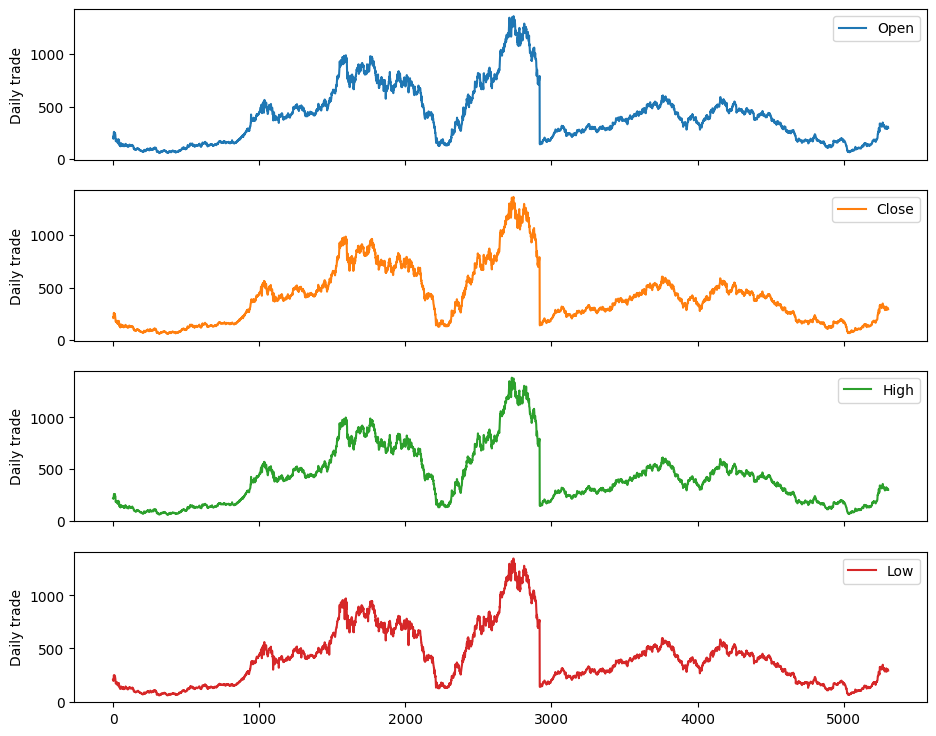

In [ ]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

#### ***Selecting data from specific time period for Time Series Analysis***
---

In [ ]:
df.set_index('Date', inplace=True)
df_sel = df['Close']['2012-01-01':'2014-12-31']
print(df_sel)
df_sel.reset_index()

Date
2012-01-02    183.95
2012-01-03    193.95
2012-01-04    201.20
2012-01-05    202.10
2012-01-06    203.60
               ...  
2014-12-24    483.95
2014-12-26    485.15
2014-12-29    495.05
2014-12-30    493.75
2014-12-31    495.55
Name: Close, Length: 745, dtype: float64


,Date,Close
0,2012-01-02,183.95
1,2012-01-03,193.95
2,2012-01-04,201.20
3,2012-01-05,202.10
4,2012-01-06,203.60
...,...,...
740,2014-12-24,483.95
741,2014-12-26,485.15
742,2014-12-29,495.05
743,2014-12-30,493.75


### ***Plotting the changes in Closing Price in the selected time period***
----

In [ ]:
df_sel = df_sel.to_frame()
fig = go.Figure([go.Scatter(x=df_sel.index,y=df_sel.Close)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Close over time ')
fig.show()

### ***Stationarity of our data***

**Rolling Window:**
A rolling window is a fixed-size subset of the data that moves along the time series data one observation at a time. At each step, the window moves forward by one observation, and statistics are recalculated for the new window.

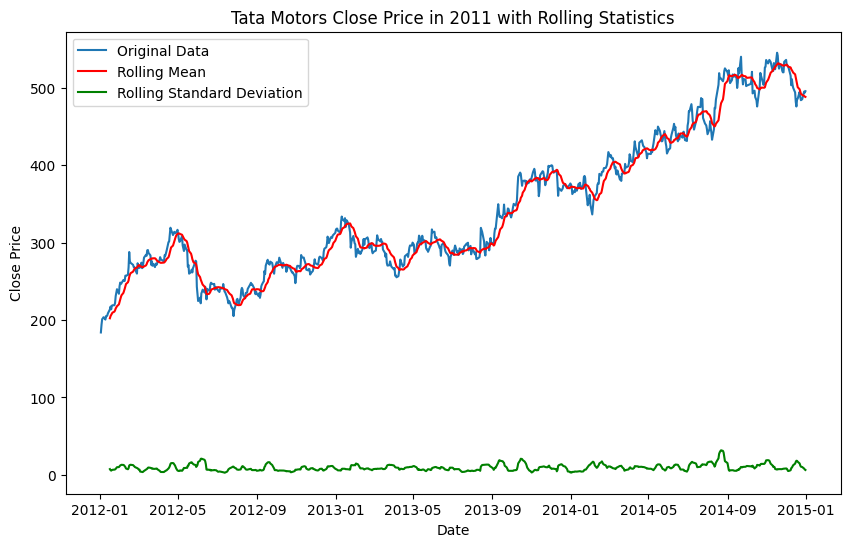

In [ ]:
rolling_mean = df_sel['Close'].rolling(window=12).mean()
rolling_std = df_sel['Close'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df_sel.index, df_sel['Close'], label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Standard Deviation')
plt.title('Tata Motors Close Price in 2011 with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

dicky_fuller_test(df_sel['Close'])

ADF Statistic: -0.891597
p-value: 0.790727
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Fail to reject the null hypothesis (H0), the data is non-stationary


**Log Transformation:** If the data has a multiplicative trend, taking the logarithm of the data can stabilize the variance, making it more stationary. This is particularly useful when dealing with exponential growth or decay.
Applying log transformation does not yeild satisfactory results as clearly seen below in the graph.

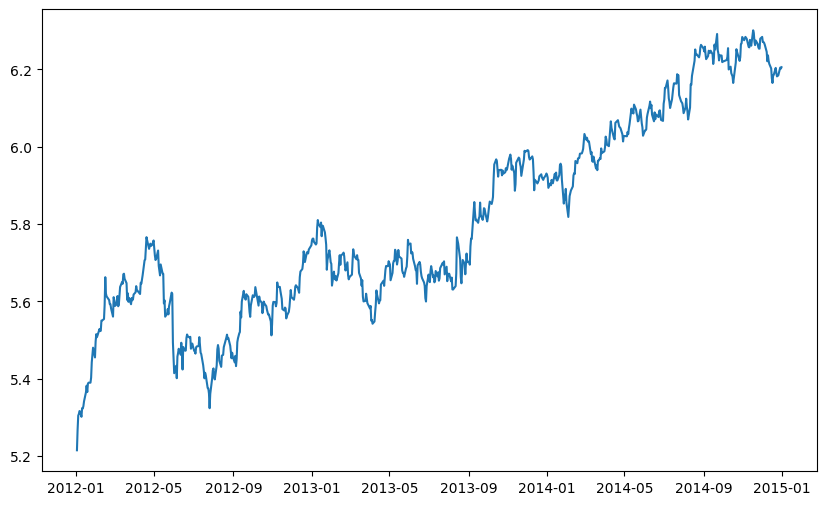

In [ ]:
plt.figure(figsize=(10,6))
df_sel_log = np.log(df_sel)
plt.plot(df_sel_log)
plt.show()

### ***Seasonal Decomposition:***
---

**Trend:** If the trend component extracted from the decomposition is relatively stable over time, it suggests that the mean of the time series remains constant, which is a characteristic of stationarity.

**Seasonal:** If the seasonal pattern repeats itself with consistent amplitude and phase across different periods, it suggests that the variance of the time series remains constant, which is another characteristic of stationarity.

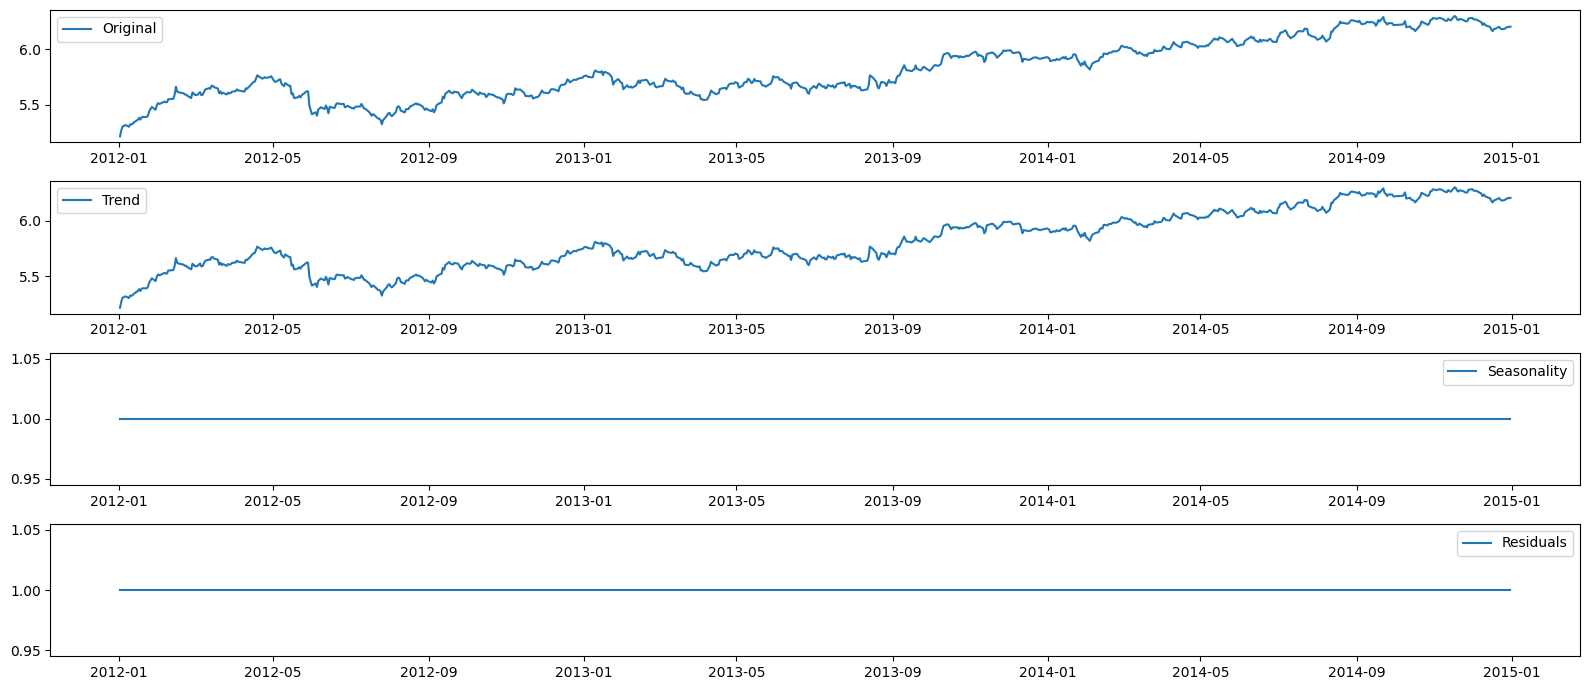

In [ ]:
decomposition = seasonal_decompose(df_sel_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 7))

plt.subplot(411)
plt.plot(df_sel_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

From above results we can say that the trend component is similar to the original data while the seasonality and residuals appear as straight lines, it suggests that there may not be a clear seasonal pattern or residual fluctuations in the data.

### ***Differencing:***
---
It is yet another method helpful in most cases to convert a non stationary data into a stationary data.

*y(t) = y(t) - y(t-1)*

After applying the difference, we again check if the data is now stationary or not. From the below figure it is clear that the data is now stationary and we can move forward.

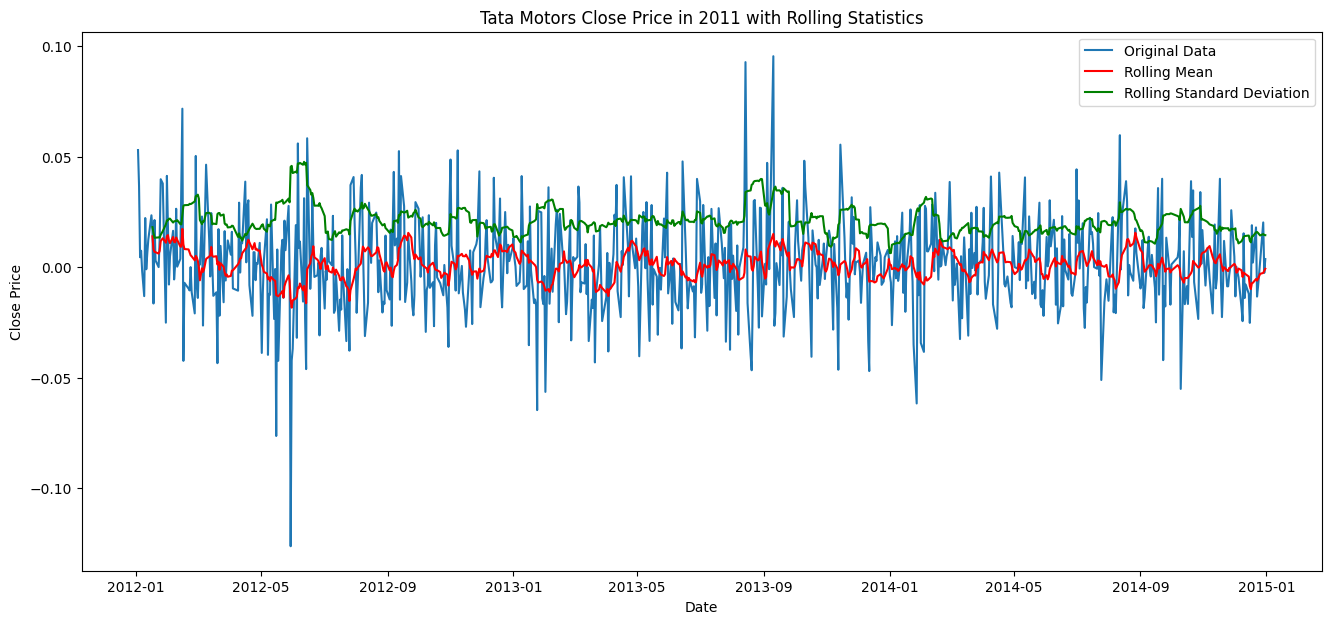

In [ ]:
df_sel_log_diff = df_sel_log - df_sel_log.shift(1)
df_sel_log_diff = df_sel_log_diff.dropna()
rolling_mean = df_sel_log_diff['Close'].rolling(window=12).mean()
rolling_std = df_sel_log_diff['Close'].rolling(window=12).std()

plt.figure(figsize=(16, 7))
plt.plot(df_sel_log_diff.index, df_sel_log_diff['Close'], label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Standard Deviation')
plt.title('Tata Motors Close Price in 2011 with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### ***Plotting Auto-correlation function and Partial Auto-correlation funtion***
---

To plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) for a financial time series data about stocks, we'll first need to take the absolute values of the returns of the stock prices. This is because the ACF and PACF are typically used to analyze the correlation structure of a time series, and in the case of financial data, we're often interested in the relationship between the current value and previous values, regardless of whether the price went up or down.

In [ ]:
df_abs = df_sel_log_diff.abs()

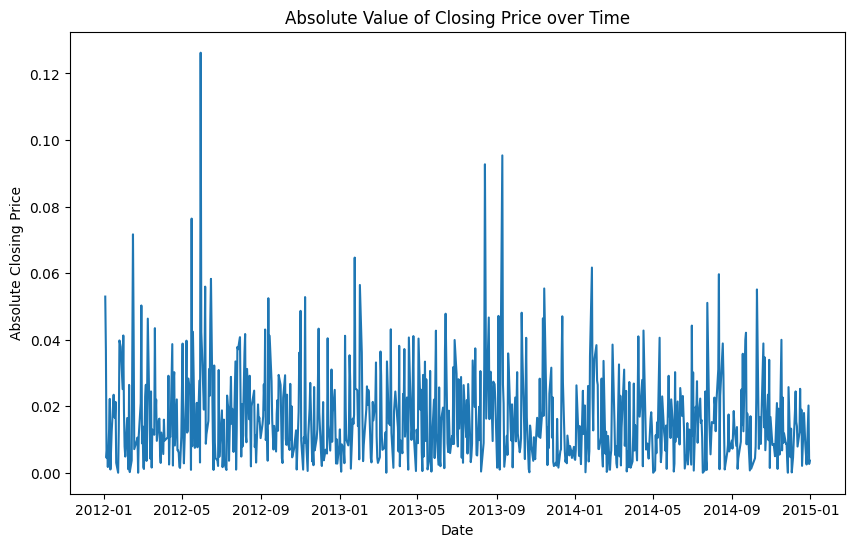

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_abs)
plt.title('Absolute Value of Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Absolute Closing Price')
plt.show()

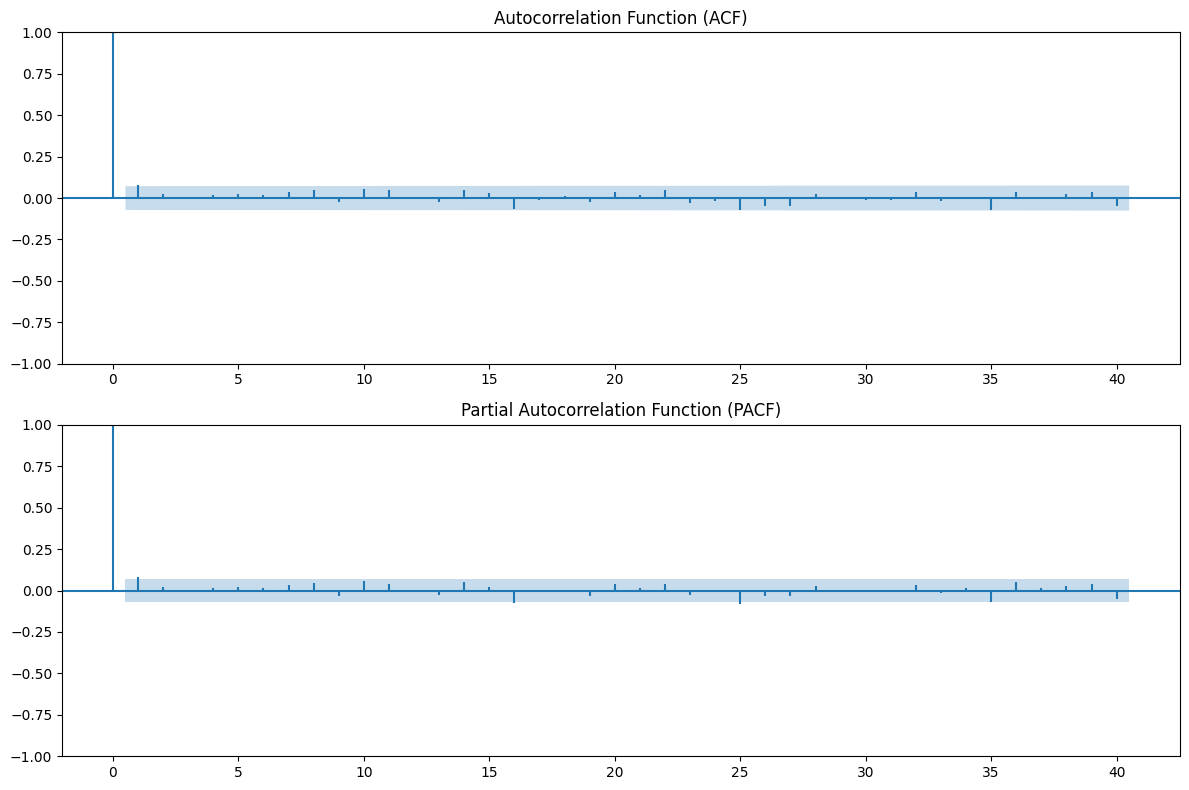

In [ ]:
lag_acf = acf(df_abs, nlags=20)
lag_pacf = pacf(df_abs, nlags=20)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_abs.dropna(), lags=40, ax=ax1, marker='')
ax1.set_title('Autocorrelation Function (ACF)')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_abs.dropna(), lags=40, ax=ax2, marker='')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

The translucent blue box is often used to denote statistical significance. If the subsequent points fall within this box, it indicates that they are not statistically significant and can be considered as noise.

We see 3 signifivant values from (AR)PACF and 1 significant value from (MA)ACF.

### ***Model Fitting***
---

In [ ]:
stepwise_fit = auto_arima(df['Close'], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43511.616, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43528.816, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43518.015, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43517.543, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43526.821, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=43514.092, Time=4.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43513.038, Time=3.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=43503.450, Time=14.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43513.134, Time=5.93 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43516.896, Time=6.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=43512.086, Time=12.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=43503.569, Time=14.49 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=43514.926, Time=9.38 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=17.24 sec
 ARIMA(3,1,2)(0,0,0)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5306
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -21744.469
Date:                Fri, 10 May 2024   AIC                          43500.939
Time:                        11:47:48   BIC                          43540.397
Sample:                             0   HQIC                         43514.727
                               - 5306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8856      0.039     48.763      0.000       1.810       1.961
ar.L2         -1.0187      0.039    -26.184      0.000      -1.095      -0.942
ar.L3          0.0712      0.010      6.946      0.000       0.051       0.091
ma.L1         -1.8389      0.038    -47.880      0.000      -1.914      -1.764
ma.L2          0.9026      0.038     24.041      0.000       0.829       0.976
sigma2       212.7046      0.495    429.960      0.000     211.735     213.674
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          79342888.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                           -14.31
Prob(H) (two-sided):                  0.00   Kurtosis:                       601.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
order = (3, 1, 2)
model = ARIMA(df['Close'], order=order)
fit_model = model.fit()

predictions = fit_model.predict(start=df['Close'].index[0], end=df['Close'].index[-1], typ='levels')
rmse = np.sqrt(mean_squared_error(df['Close'], predictions))
print("RMSE:", rmse)

RMSE: 14.883082845578443


In [ ]:
order = (3, 1, 1)
model = ARIMA(df['Close'], order=order)
fit_model = model.fit()

predictions = fit_model.predict(start=df['Close'].index[0], end=df['Close'].index[-1], typ='levels')
rmse = np.sqrt(mean_squared_error(df['Close'], predictions))
print("RMSE:", rmse)

RMSE: 14.899545464279262


In [ ]:
trace_actual = go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Actual Close')

trace_predicted = go.Scatter(x=df.index, y=predictions, mode='lines', name='Predicted Close', line=dict(color='red'))

layout = go.Layout(
    title='Actual vs Predicted (Close)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price'),
    legend=dict(x=0.1, y=1.1)
)

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()

#Conclusion

In this notebook, we analyzed **Tata Motors stock data**, performed exploratory data analysis (EDA), and visualized key trends.
Key takeaways include:
- 📈 Identified overall stock price trends and patterns.
- 🔍 Analyzed daily returns and volatility.
- 📊 Visualized moving averages for trend smoothing.
- 💡 Gained insights that can inform future investment or forecasting strategies.